In [1]:
import tensorflow as tf
import numpy as np
import pickle
import matplotlib.pyplot as plt
import time
import load_dog

<h1>Load training, validation, testing set from your preprocessed files</h1>

In [2]:
val_data, val_labels = load_dog.load_validation_batch()
test_data = load_dog.load_test_batch(1)

<h1>Define hyperparameter</h1>

In [3]:
num_epochs = 10
batch_size = 128
lr = 0.0001
dropout_rate = 0.5

<h1>Placeholder</h1>

In [4]:
tf.reset_default_graph()
net_features = tf.placeholder(tf.float32, shape=(None, 227, 227, 3))
net_labels = tf.placeholder(tf.float32, shape=(None, 2))
training = tf.placeholder_with_default(False, shape=(),name='training')

<h1>AlexNet</h1>

In [5]:
conv_1 = tf.layers.conv2d(net_features, filters=96,kernel_size=11, strides=4,activation=tf.nn.relu)
maxpool_1 = tf.layers.max_pooling2d(conv_1, pool_size=3, strides=2)
pool1_bn = tf.layers.batch_normalization(maxpool_1)
padding_1 = tf.constant([[0,0], [2,2], [2,2], [0,0]])
layer_1 = tf.pad(pool1_bn, padding_1)

conv_2 = tf.layers.conv2d(layer_1, filters=256,kernel_size=5, strides=1,activation=tf.nn.relu)
maxpool_2 = tf.layers.max_pooling2d(conv_2, pool_size=3,strides=2)
pool2_bn = tf.layers.batch_normalization(maxpool_2)
padding_2 = tf.constant([[0,0], [1,1], [1,1], [0,0]])
layer_2 = tf.pad(pool2_bn, padding_2)

conv_3 = tf.layers.conv2d(layer_2, filters=384, kernel_size=3, strides=1, activation=tf.nn.relu)
layer_3 = tf.pad(conv_3, padding_2)

conv_4 = tf.layers.conv2d(layer_3, filters=384,kernel_size=3, strides=1, activation=tf.nn.relu)
layer_4 = tf.pad(conv_4, padding_2)

conv_5 = tf.layers.conv2d(layer_4, filters=256, kernel_size=3, strides=1,activation=tf.nn.relu)
maxpool_5 = tf.layers.max_pooling2d(conv_5, pool_size=3, strides=2)
pool5_bn = tf.layers.batch_normalization(maxpool_5)


conv_6 = tf.layers.conv2d(pool5_bn, filters=4096, kernel_size=6, strides=1, activation=tf.nn.relu)
layer_6 = tf.layers.flatten(conv_6)

fc_1 = tf.layers.dense(layer_6, units=4096, activation=tf.nn.relu)
fc_drop_1 = tf.layers.dropout(fc_1,dropout_rate,training=training)
fc_2 = tf.layers.dense(fc_drop_1, units=4096, activation=tf.nn.relu)
fc_drop_2 = tf.layers.dropout(fc_2,dropout_rate,training=training)
output = tf.layers.dense(fc_drop_2, units=2)

Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.max_pooling2d instead.
Instructions for updating:
Use keras.layers.batch_normalization instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


<h1>Cost and Optimization</h1>

In [6]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=net_labels, logits=output))
opt = tf.train.AdamOptimizer(learning_rate=lr)
minimize = opt.minimize(loss)
 
correct_pred = tf.equal(tf.argmax(tf.nn.softmax(output),1),tf.argmax(net_labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

<h1>Training and validation</h1>
<h2>Train your model only 10 epochs</h2>
<p style="font-size:20px">1. Print out training accuracy and validation accuracy each training epoch</p>
<p style="font-size:20px">2. Print out training time each training epoch</p>
<p style="font-size:20px">3. Your goal is to reach 85% validation accuracy in 10 training epochs. If you reach that, you can perform testing, print out your test accuracy. Plot out the ten images with title that contains the probability of the labeled class.</p>

In [7]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_epochs):
        ts = time.time()
        batch_num = 0
        while batch_num < 10:
            training_data = load_dog.load_training_batch(batch_num, batch_size)
            for data, labels in training_data:
                f_dict = {net_features: data, net_labels: labels, training:True}
                sess.run(minimize, feed_dict=f_dict)
                if batch_num == 9:
                    train_acc = sess.run(accuracy, feed_dict=f_dict)
            batch_num += 1
        te = time.time()
        val_acc = sess.run(accuracy, feed_dict={net_features: val_data, net_labels: val_labels})
        print("Epoch " + str(i+1) + ", Training Accuracy:{:.4f}".format(train_acc)+ ", Validation Accuracy:{:.4f}".format(val_acc)+", Time: {:.3f}s\t".format(te-ts)) 
    save_path = saver.save(sess, 'model.ckpt')
    print("Training finished!")

Epoch 1, Training Accuracy:0.6172, Validation Accuracy:0.5780, Time: 97.926s	
Epoch 2, Training Accuracy:0.8203, Validation Accuracy:0.7740, Time: 94.091s	
Epoch 3, Training Accuracy:0.8828, Validation Accuracy:0.8000, Time: 93.937s	
Epoch 4, Training Accuracy:0.8672, Validation Accuracy:0.7700, Time: 94.628s	
Epoch 5, Training Accuracy:0.8672, Validation Accuracy:0.8160, Time: 94.415s	
Epoch 6, Training Accuracy:0.9219, Validation Accuracy:0.8340, Time: 94.372s	
Epoch 7, Training Accuracy:0.9297, Validation Accuracy:0.8560, Time: 94.031s	
Epoch 8, Training Accuracy:0.9375, Validation Accuracy:0.8680, Time: 94.192s	
Epoch 9, Training Accuracy:0.9531, Validation Accuracy:0.8620, Time: 93.957s	
Epoch 10, Training Accuracy:0.9922, Validation Accuracy:0.8760, Time: 94.362s	
Training finished!


INFO:tensorflow:Restoring parameters from model.ckpt


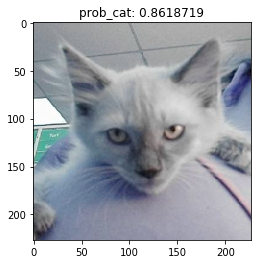

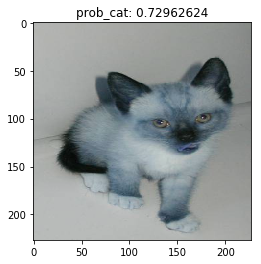

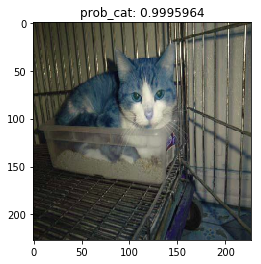

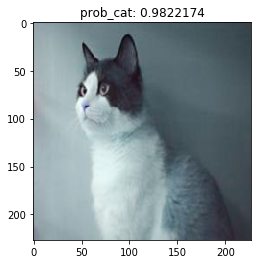

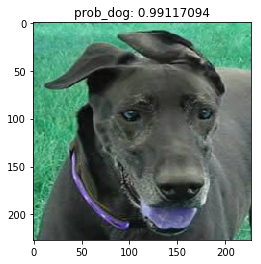

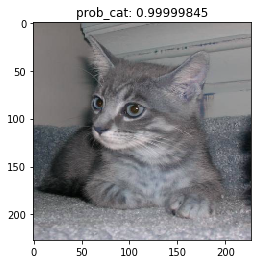

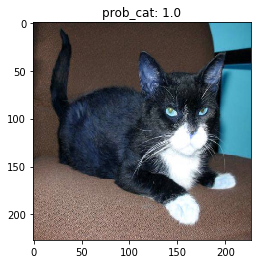

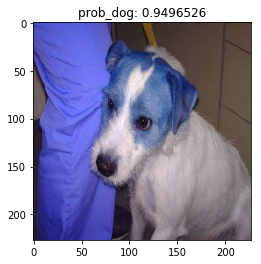

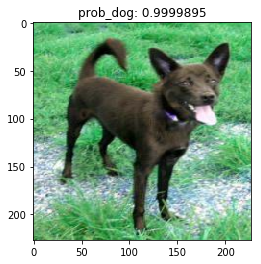

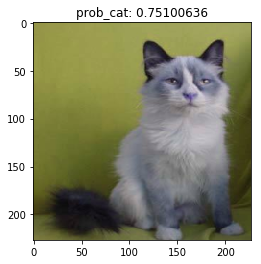

In [9]:
with tf.Session() as sess:
    saver.restore(sess, "model.ckpt")
    pred = sess.run(tf.nn.softmax(output), feed_dict = {net_features:test_data[:10]})
    for i in range(10):
        result = "prob_cat: "+str(pred[i][0])
        if (pred[i][1] > pred[i][0]):
            result = "prob_dog: "+str(pred[i][1])
        fig = plt.figure()
        plt.imshow(test_data[i])
        plt.title(result)
        